In [6]:
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

In [8]:
df = pd.read_excel("DummySales.xlsx")

In [9]:
df.head()

,DocDate,ItemCode,Store,Product Description,Price,Cost Price,Quantity,Group,Category,Brand
0,2021-03-01,FG-000019,NSHRS-01,Glaxose-D 100G,58.0,46.600,1.0,Beverage,Non Food,Glaxose-D
1,2021-03-02,FG-000032,KRDRS-01,Quice Ice Cream Syrup 800Ml,265.0,241.185,2.0,Beverage,Food,Qarshi
2,2021-03-03,FG-000033,NSHRS-01,Rooh Afza 1.5Ltr,455.0,368.497,8.0,Beverage,Food,Rooh Afza
3,2021-03-04,FG-000041,FBARS-01,Tang Lemon&Pepper 125Gm Pk,58.0,44.747,10.0,Beverage,Food,Tang
4,2021-03-05,FG-000042,GRDRS-01,Tang Lemon&Pepper 375G Pb Pk,192.0,149.170,6.0,Beverage,Food,Tang


In [10]:
df1 = df.copy() 

# DATA PREPROCESSING & EDA & FEATURE ENGINEERING

In [14]:
df1.tail()

,DocDate,ItemCode,Store,Product Description,Price,Cost Price,Quantity,Group,Category,Brand
29995,2022-03-02,FG-016006,NSHRS-01,Baou Fruit Knife 3Pcs F256 (19024/7),249.0,200.000000,1.0,China Town,Non Food,China
29996,2022-03-02,FG-016012,NKHRS-01,Bath Sponge 1S Mix (27304/2),70.0,53.932766,6.0,China Town,Non Food,China
29997,2022-03-02,FG-016179,GRDRS-01,China Ladies Jewellery Set Tr15#21-4,349.0,245.000000,1.0,China Town,Non Food,China
29998,2022-03-02,FG-016365,CLFRS-01,Cloth Rope 20M (16862/1),199.0,150.010000,1.0,China Town,Non Food,China
29999,2022-03-02,FG-016370,NKHRS-01,Cobor Tooth Brush 1S E-882 (34137/8),80.0,55.005000,4.0,China Town,Non Food,China


In [16]:
df1.dtypes

DocDate                datetime64[ns]
ItemCode                       object
Store                          object
Product Description            object
Price                         float64
Cost Price                    float64
Quantity                      float64
Group                          object
Category                       object
Brand                          object
dtype: object

In [18]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DocDate              30000 non-null  datetime64[ns]
 1   ItemCode             30000 non-null  object        
 2   Store                30000 non-null  object        
 3   Product Description  30000 non-null  object        
 4   Price                30000 non-null  float64       
 5   Cost Price           30000 non-null  float64       
 6   Quantity             30000 non-null  float64       
 7   Group                30000 non-null  object        
 8   Category             30000 non-null  object        
 9   Brand                29955 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(6)
memory usage: 2.3+ MB


In [20]:
df1.shape

(30000, 10)

In [22]:
df1.describe()

,DocDate,Price,Cost Price,Quantity
count,30000,30000.000000,30000.000000,30000.000000
mean,2022-04-06 13:13:20.640000,240.932980,186.341116,4.813038
min,2021-03-01 00:00:00,4.000000,0.000000,-24.000000
25%,2022-03-01 00:00:00,75.000000,56.130000,1.000000
50%,2022-03-01 00:00:00,140.000000,106.710679,2.000000
75%,2022-03-02 00:00:00,275.000000,205.132500,4.000000
max,2026-04-25 00:00:00,6580.000000,6100.000000,744.000000
std,NaN,348.971123,283.083117,15.946442


In [24]:
df1['Day'] = df1['DocDate'].dt.day
df1['Month'] = df1['DocDate'].dt.month
df1['Year'] = df1['DocDate'].dt.year

In [26]:
df1.drop('DocDate',axis=1,inplace=True)

In [28]:
df1

,ItemCode,Store,Product Description,Price,Cost Price,Quantity,Group,Category,Brand,Day,Month,Year
0,FG-000019,NSHRS-01,Glaxose-D 100G,58.0,46.600000,1.0,Beverage,Non Food,Glaxose-D,1,3,2021
1,FG-000032,KRDRS-01,Quice Ice Cream Syrup 800Ml,265.0,241.185000,2.0,Beverage,Food,Qarshi,2,3,2021
2,FG-000033,NSHRS-01,Rooh Afza 1.5Ltr,455.0,368.497000,8.0,Beverage,Food,Rooh Afza,3,3,2021
3,FG-000041,FBARS-01,Tang Lemon&Pepper 125Gm Pk,58.0,44.747000,10.0,Beverage,Food,Tang,4,3,2021
4,FG-000042,GRDRS-01,Tang Lemon&Pepper 375G Pb Pk,192.0,149.170000,6.0,Beverage,Food,Tang,5,3,2021
...,...,...,...,...,...,...,...,...,...,...,...,...
29995,FG-016006,NSHRS-01,Baou Fruit Knife 3Pcs F256 (19024/7),249.0,200.000000,1.0,China Town,Non Food,China,2,3,2022
29996,FG-016012,NKHRS-01,Bath Sponge 1S Mix (27304/2),70.0,53.932766,6.0,China Town,Non Food,China,2,3,2022
29997,FG-016179,GRDRS-01,China Ladies Jewellery Set Tr15#21-4,349.0,245.000000,1.0,China Town,Non Food,China,2,3,2022
29998,FG-016365,CLFRS-01,Cloth Rope 20M (16862/1),199.0,150.010000,1.0,China Town,Non Food,China,2,3,2022


In [30]:
df1['Store'] = df1['Store'].str[:-3]

In [32]:
df1.columns 

Index(['ItemCode', 'Store', 'Product Description', 'Price', 'Cost Price',
       'Quantity', 'Group', 'Category', 'Brand', 'Day', 'Month', 'Year'],
      dtype='object')

In [34]:
rf = df1[['Day','Month','Year','ItemCode','Store','Product Description','Price','Cost Price','Group','Category']]

In [36]:
rf.head()

,Day,Month,Year,ItemCode,Store,Product Description,Price,Cost Price,Group,Category
0,1,3,2021,FG-000019,NSHRS,Glaxose-D 100G,58.0,46.600,Beverage,Non Food
1,2,3,2021,FG-000032,KRDRS,Quice Ice Cream Syrup 800Ml,265.0,241.185,Beverage,Food
2,3,3,2021,FG-000033,NSHRS,Rooh Afza 1.5Ltr,455.0,368.497,Beverage,Food
3,4,3,2021,FG-000041,FBARS,Tang Lemon&Pepper 125Gm Pk,58.0,44.747,Beverage,Food
4,5,3,2021,FG-000042,GRDRS,Tang Lemon&Pepper 375G Pb Pk,192.0,149.170,Beverage,Food


In [38]:
rf["Product Description"].value_counts()

Product Description
Olpers Flv Milk 180Ml Chocolate                      16
Lu Prince Choc Bar Pack 12S                          16
Tang Pineapple 125Gm Pk                              16
Pepsi Pet 345Ml                                      15
Day Fresh Flv Milk 235Ml Chocolate                   15
                                                     ..
Adidas Shower Gel 250Ml Champions League              1
Dove Cream Wash 500Ml Coconut Milk&Jasmine Petals     1
Emami Fair&Handsome 60Ml                              1
Saeed Ghani Specialubtan 100G                         1
China Ladies Jewellery Set Tr15#21-4                  1
Name: count, Length: 7492, dtype: int64

In [40]:
rf['Product Description'] = rf['Product Description'].apply(lambda rf:rf.strip())
product_count = rf['Product Description'].value_counts()

In [42]:
product_count_less = product_count[product_count<=12]
product_count_less.head

<bound method NDFrame.head of Product Description
Pringles Chips 107Gm Sour Cream&Onion                12
Lu Prince Choc 6S Snack Pack                         12
National Crushed Pickle Mixed 390Gm Jar              12
Millac Milk Powder 910Gm                             12
Rafhan Custard 275G Mango                            12
                                                     ..
Adidas Shower Gel 250Ml Champions League              1
Dove Cream Wash 500Ml Coconut Milk&Jasmine Petals     1
Emami Fair&Handsome 60Ml                              1
Saeed Ghani Specialubtan 100G                         1
China Ladies Jewellery Set Tr15#21-4                  1
Name: count, Length: 7277, dtype: int64>

In [44]:
rf['Product Description'] = rf['Product Description'].apply(lambda x:'other' if x in product_count_less else x)

In [46]:
rf['Product Description'].value_counts()

Product Description
other                                27082
Tang Pineapple 125Gm Pk                 16
Olpers Flv Milk 180Ml Chocolate         16
Lu Prince Choc Bar Pack 12S             16
7Up Pet 345Ml                           15
                                     ...  
Max Lemon D/Wash Liq 475Ml Bottle       13
Sunlight Detergent 850Gm Green          13
Express Power 1Kg                       13
Tullo Cooking Oil 1Ltr Pb               13
Rafhan Custard 275G Vanilla             13
Name: count, Length: 216, dtype: int64

In [48]:
rf.head()

,Day,Month,Year,ItemCode,Store,Product Description,Price,Cost Price,Group,Category
0,1,3,2021,FG-000019,NSHRS,other,58.0,46.600,Beverage,Non Food
1,2,3,2021,FG-000032,KRDRS,Quice Ice Cream Syrup 800Ml,265.0,241.185,Beverage,Food
2,3,3,2021,FG-000033,NSHRS,other,455.0,368.497,Beverage,Food
3,4,3,2021,FG-000041,FBARS,other,58.0,44.747,Beverage,Food
4,5,3,2021,FG-000042,GRDRS,Tang Lemon&Pepper 375G Pb Pk,192.0,149.170,Beverage,Food


In [50]:
rf["total price"] = rf["Price"].astype('int32')
rf["total cost"] = rf["Cost Price"].astype('int32')

In [52]:
rf.drop(columns=['Price','Cost Price'],inplace=True)

In [54]:
rf.head()

,Day,Month,Year,ItemCode,Store,Product Description,Group,Category,total price,total cost
0,1,3,2021,FG-000019,NSHRS,other,Beverage,Non Food,58,46
1,2,3,2021,FG-000032,KRDRS,Quice Ice Cream Syrup 800Ml,Beverage,Food,265,241
2,3,3,2021,FG-000033,NSHRS,other,Beverage,Food,455,368
3,4,3,2021,FG-000041,FBARS,other,Beverage,Food,58,44
4,5,3,2021,FG-000042,GRDRS,Tang Lemon&Pepper 375G Pb Pk,Beverage,Food,192,149


In [56]:
rf = rf[rf['total price']>0]
rf = rf[rf['total cost']>0]

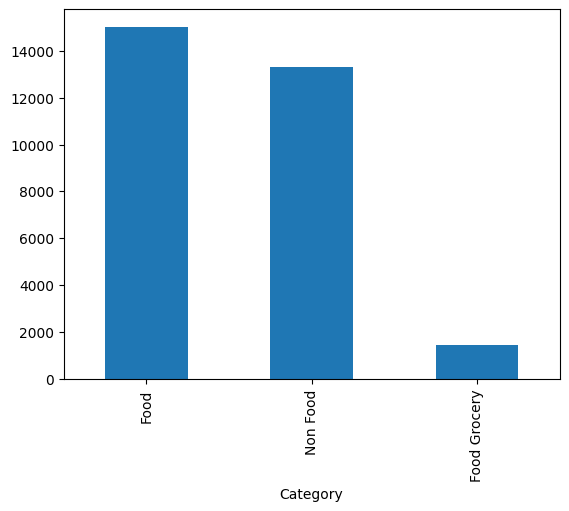

In [58]:
rf['Category'].value_counts().plot(kind='bar')
plt.show()

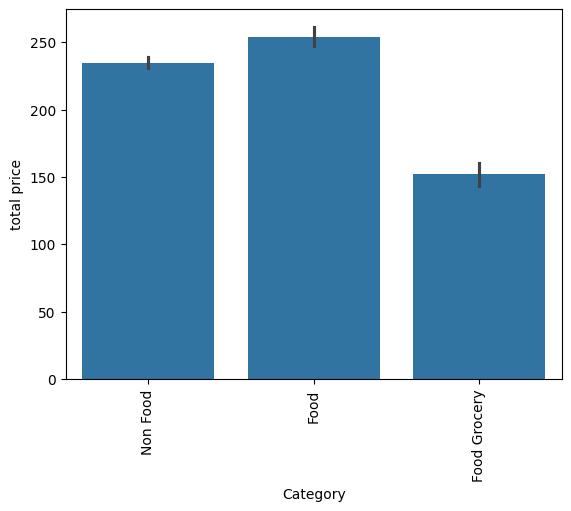

<Figure size 640x480 with 0 Axes>

In [59]:
sns.barplot(x=rf['Category'],y=rf['total price'])
plt.xticks(rotation='vertical')
plt.show()
plt.savefig("barplot.png")

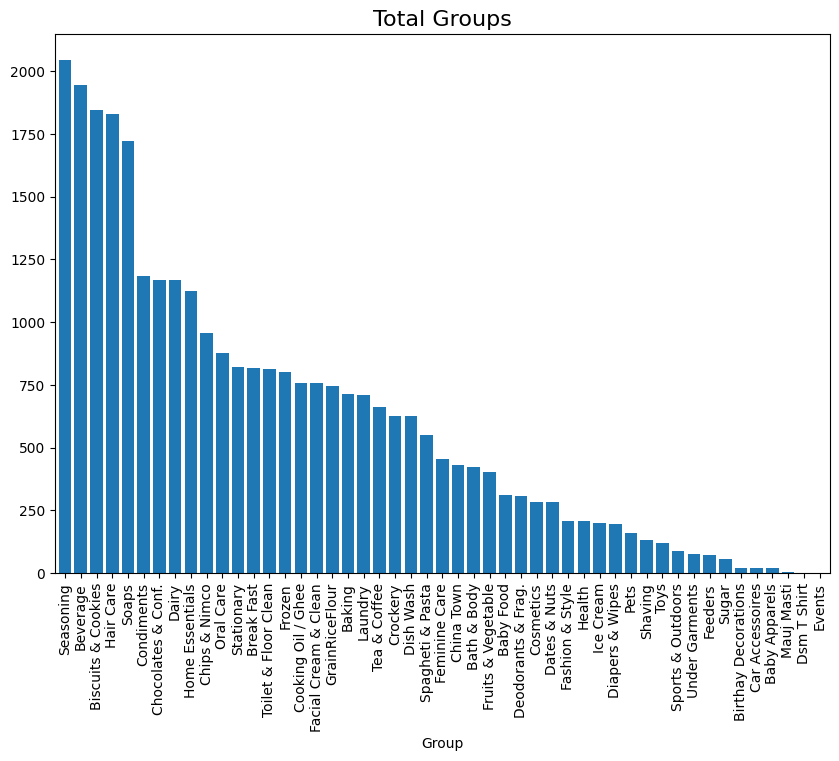

<Figure size 640x480 with 0 Axes>

In [61]:
rf['Group'].value_counts().plot(kind='bar',width=0.8,figsize=(10,7))
# plt.xticks(rotation='vertical')
# plt.show()
plt.title('Total Groups',fontsize=16)
plt.xticks(rotation='vertical')  # Set rotation mode to anchor
plt.gca().margins(x=0.2)  # Add margin on the x-axis
plt.show()
plt.savefig("DistributionofGroupCountsinDataset.png")

In [62]:
rf.to_csv('rf2.csv',index=False)

<Axes: xlabel='total price', ylabel='Density'>

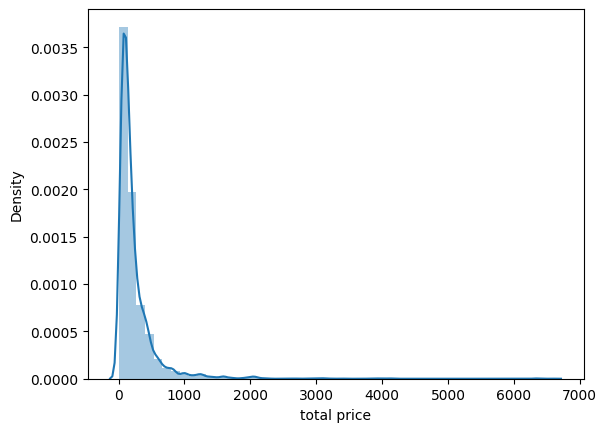

In [63]:
sns.distplot(rf['total price'])

<Axes: xlabel='total price', ylabel='Density'>

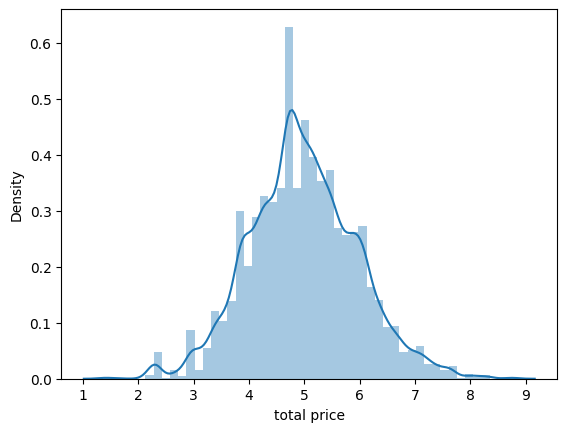

In [64]:
sns.distplot(np.log(rf['total price']))

In [65]:
X = rf.drop(columns=['total price'])
y = np.log(rf['total price'])

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [68]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [76]:
print(X_train.shape)
print(X_test.shape)

(23797, 9)
(5950, 9)


In [78]:
rf.columns

Index(['Day', 'Month', 'Year', 'ItemCode', 'Store', 'Product Description',
       'Group', 'Category', 'total price', 'total cost'],
      dtype='object')

In [80]:
colum_trans = make_column_transformer((OneHotEncoder(sparse_output=False,handle_unknown='ignore'), ['ItemCode', 'Store', 'Product Description',
                                           'Group', 'Category']),remainder='passthrough')

In [82]:
colum_trans

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse_output=False),
                                 ['ItemCode', 'Store', 'Product Description',
                                  'Group', 'Category'])])

In [84]:
from sklearn.ensemble import RandomForestRegressor

In [86]:
rfg = RandomForestRegressor(n_estimators=100, random_state=42)

In [88]:
pipe_rf = make_pipeline(colum_trans,rfg)

In [90]:
pipe_rf.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['ItemCode', 'Store',
                                                   'Product Description',
                                                   'Group', 'Category'])])),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

In [92]:
y_pred_rf = pipe_rf.predict(X_test)

In [94]:
y_pred_original_scale = np.exp(y_pred_rf)

In [96]:
y_test_original_scale = np.exp(y_test)

In [100]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
r2 = r2_score(y_test_original_scale, y_pred_original_scale)
mae = mean_absolute_error(y_test_original_scale, y_pred_original_scale)
mse = mean_squared_error(y_test_original_scale, y_pred_original_scale)
# Print the results
print("R² score:", r2*100)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (MSE):", np.sqrt(mse))

R² score: 99.4879109663491
Mean Absolute Error (MAE): 6.807834361657206
Mean Squared Error (MSE): 551.6507053027065
Root Mean Squared Error (MSE): 23.487245587822905


In [102]:
rf.columns

Index(['Day', 'Month', 'Year', 'ItemCode', 'Store', 'Product Description',
       'Group', 'Category', 'total price', 'total cost'],
      dtype='object')

In [104]:
df_Sale_item = pd.DataFrame(np.c_[X_test, y_test_original_scale, y_pred_original_scale], columns = ["Day","Month","Year","ItemCode","Store","Product Description","Group","Category","total cost","price_original","price_predicted"])

In [106]:
df_Sale_item.sample(35)

,Day,Month,Year,ItemCode,Store,Product Description,Group,Category,total cost,price_original,price_predicted
5261,1,3,2022,FG-003312,GRDRS,other,Seasoning,Food,54,70.0,70.0
4143,2,3,2022,FG-000523,GRDRS,other,Biscuits & Cookies,Food,87,114.0,114.0
1874,2,3,2022,FG-002469,NKHRS,other,Ice Cream,Food,24,40.0,39.818785
5662,1,3,2022,FG-000289,NZMRS,other,Beverage,Food,71,78.0,78.221139
700,2,3,2022,FG-006328,NKHRS,other,Oral Care,Non Food,168,205.0,212.188999
339,2,3,2022,FG-002194,NKHRS,other,Sugar,Food,401,510.0,462.436366
2560,1,3,2022,FG-002659,FBARS,other,Condiments,Food,161,220.0,218.64663
5046,2,3,2022,FG-011775,FBARS,other,Facial Cream & Clean,Non Food,91,125.0,122.360612
3727,2,3,2022,FG-014532,NKHRS,other,Under Garments,Non Food,56,75.0,77.984318
1890,7,12,2025,FG-003338,GRDRS,other,Seasoning,Food,106,140.0,138.653606


In [108]:
# Assuming 'X_test' is your test data with the correct number of features
inputs_1 = X_test.iloc[[173]] # Select the 31st row

# Predict with the model
prediction = pipe_rf.predict(inputs_1)
exp_prediction = np.exp(prediction)
print("Actual Class :", y_test_original_scale.iloc[173])
print("Predicted Class:", exp_prediction[0])

Actual Class : 1280.0
Predicted Class: 1291.6575113134502


# Save Your Model 

In [111]:
import joblib 

In [113]:
joblib.dump(pipe_rf,r'C:\Users\AM BUSINESS\Desktop\Model Deployment\pipe_rf_item.sav')

['C:\\Users\\AM BUSINESS\\Desktop\\Model Deployment\\pipe_rf_item.sav']

In [115]:
model = joblib.load(r'C:\Users\AM BUSINESS\Desktop\Model Deployment\pipe_rf_item.sav')

In [127]:
input_data = pd.DataFrame({
    'Day':[1],
    'Month':[3],
    'Year':[2022],
    'ItemCode':['FG-003122'],
    'Store':['GRDRS'],
    'Product Description':['other'],
    'Group':['Seasoning'],
    'Category':['Food'],
    'total cost':[54]
})
pred = model.predict(input_data)[0]
exp_prediction = np.exp(pred)
prediction = int(exp_prediction)

print("Predicition Value",prediction)
print(f"Total Sales is between {prediction-20} and {prediction+20}")

Predicition Value 70
Total Sales is between 50 and 90
